# Industry 4.0 의 중심, BigData

<div align='right'><font size=2 color='gray'>Data Processing Based Python @ <font color='blue'><a href='https://www.facebook.com/jskim.kr'>FB / jskim.kr</a></font>, [김진수](bigpycraft@gmail.com)</font></div>
<hr>

## 서울시 구별 인구 현황

### 서울시 통계DB
- http://stat.seoul.go.kr/jsp3/index.jsp
- 서울에서 인구수가 많으면 고령비율도 높을까?

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['figure.figsize'] = (10,6)

from IPython.display import Image

reference = lambda file, w=None, h=None : \
    Image(filename=file, width=w, height=h) 
    
stat_01 = './images/DC_stat_seoul_population.png'
stat_02 = './images/seoul_map.gif'

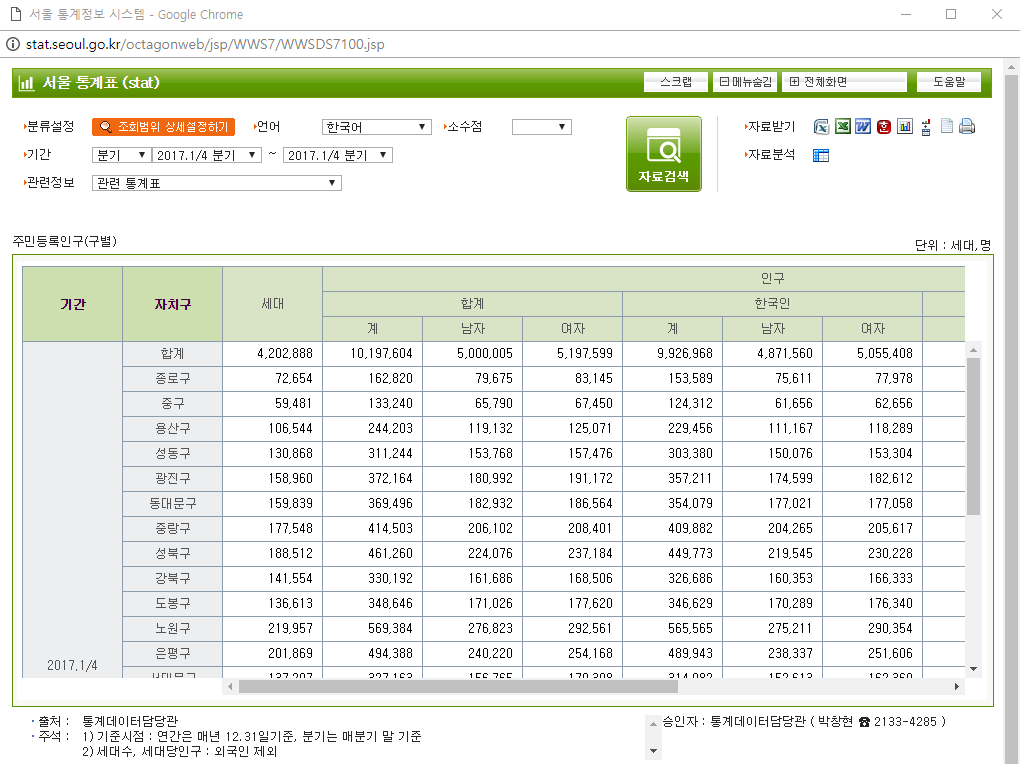

In [3]:
Image(stat_01)

In [4]:
population = pd.read_excel('data/Report_seoul_population_2018_4Q.xls', 
                     header=2,
                     # parse_cols="B, C, D, M, N"                           
                     usecols="B, C, D, M, N"
                    )
population.head()

자치구       세대         계  세대당인구  65세이상고령자
0   합계  4263868  10049607   2.29   1416131
1  종로구    73735    163026   2.08     26742
2   중구    61502    135633   2.04     22005
3  용산구   108974    245090   2.10     37640
4  성동구   137209    316463   2.25     42767

In [5]:
population.tail()

자치구      세대       계  세대당인구  65세이상고령자
21  관악구  262222  520040   1.91     72249
22  서초구  172918  438163   2.51     54751
23  강남구  228775  547453   2.37     67085
24  송파구  270866  673507   2.46     81364
25  강동구  177247  431920   2.41     58770

#### <font color='blue'> # unique 체크후, 합계오 nan 부분을 drop </font>

In [6]:
population['자치구'].unique()

array(['합계', '종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구',
       '강북구', '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구',
       '금천구', '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'],
      dtype=object)

In [7]:
population = population.drop([0])
population

자치구      세대       계  세대당인구  65세이상고령자
1    종로구   73735  163026   2.08     26742
2     중구   61502  135633   2.04     22005
3    용산구  108974  245090   2.10     37640
4    성동구  137209  316463   2.25     42767
5    광진구  162606  371063   2.19     45619
6   동대문구  161820  364338   2.15     57165
7    중랑구  180511  408147   2.23     61830
8    성북구  186601  447687   2.34     67782
9    강북구  143395  322915   2.23     58196
10   도봉구  138087  341649   2.46     55964
11   노원구  217655  548160   2.50     77096
12   은평구  205001  487666   2.36     77420
13  서대문구  138549  323080   2.24     50456
14   마포구  172505  386359   2.17     50833
15   양천구  176498  468145   2.63     58045
16   강서구  258503  603611   2.31     79660
17   구로구  172457  438486   2.35     61801
18   금천구  107971  254021   2.17     35739
19  영등포구  171085  403600   2.15     55673
20   동작구  177176  409385   2.24     59479
21   관악구  262222  520040   1.91     72249
22   서초구  172918  438163   2.51     54751
23   강남구  228775  547453   2.37     67085
24   송파구  270866  673507   2.46     81364
25   강동구  177247  431920   2.41     58770

In [8]:
population['자치구'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구'], dtype=object)

In [9]:
population.rename(columns = {'계':'인구수'}, inplace=True)
population.rename(columns = {'자치구':'구'}, inplace=True)
population.head()

구      세대     인구수  세대당인구  65세이상고령자
1  종로구   73735  163026   2.08     26742
2   중구   61502  135633   2.04     22005
3  용산구  108974  245090   2.10     37640
4  성동구  137209  316463   2.25     42767
5  광진구  162606  371063   2.19     45619

C:\Python\Anaconda3-1812\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


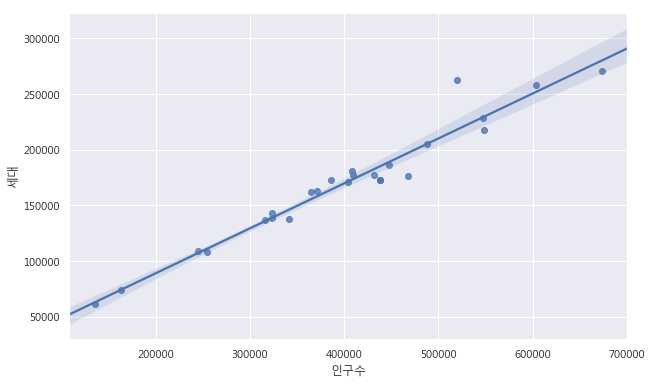

In [10]:
sns.regplot(x="인구수", y="세대", data=population);

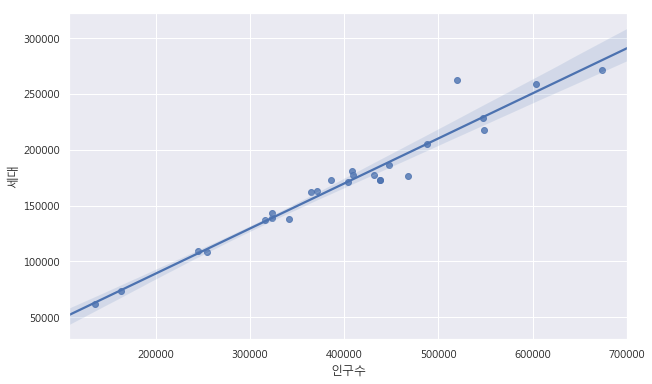

In [11]:
sns.regplot(x="인구수", y="세대", data=population);

In [12]:
sns.regplot(x="인구수", y="65세이상고령자", data=population);

### <font color='blue'> 참조.  https://github.com/southkorea/southkorea-maps/tree/master/kostat/2013/json </font>

In [13]:
import json
import folium
import warnings
warnings.simplefilter(action = "ignore", category = FutureWarning)

In [14]:
geo_path = 'data/skorea_municipalities_geo_simple.json'

geo_str = json.load(open(geo_path, encoding='utf-8'))
# geo_str

In [15]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['인구수']})
guDat.head()

gu  counts
1  종로구  163026
2   중구  135633
3  용산구  245090
4  성동구  316463
5  광진구  371063

In [16]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')
map

In [17]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='YlGnBu', #PuRd, YlGnBu
              key_on='feature.id')

In [18]:
map

```
<font size=4>서울시 지도</font>
<img src='./images/seoul_map.gif' height=400 width=600>
```

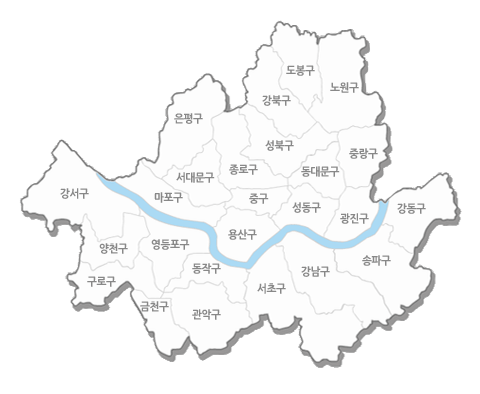

In [19]:
# 서울시 지도
Image(stat_02, height=400, width=600)

In [20]:
map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [21]:
map

In [22]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['65세이상고령자']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [23]:
map

In [24]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['세대당인구']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')


In [25]:
map

In [26]:
population['고령비율'] = population['65세이상고령자'] / population['인구수'] * 100
population.head()

구      세대     인구수  세대당인구  65세이상고령자       고령비율
1  종로구   73735  163026   2.08     26742  16.403518
2   중구   61502  135633   2.04     22005  16.223928
3  용산구  108974  245090   2.10     37640  15.357624
4  성동구  137209  316463   2.25     42767  13.514060
5  광진구  162606  371063   2.19     45619  12.294139

In [27]:
guDat = pd.DataFrame({'gu':population['구'], 'counts':population['고령비율']})

map = folium.Map(location=[37.5502, 126.982], zoom_start=11, tiles='Stamen Toner')

map.choropleth(geo_data=geo_str,
              data=guDat,
              columns=['gu', 'counts'],
              fill_color='PuRd', #PuRd, YlGnBu
              key_on='feature.id')

In [28]:
map

In [29]:
population.sort_values(by='65세이상고령자', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
24  송파구  270866  673507   2.46     81364  12.080647
16  강서구  258503  603611   2.31     79660  13.197241
12  은평구  205001  487666   2.36     77420  15.875620
11  노원구  217655  548160   2.50     77096  14.064507
21  관악구  262222  520040   1.91     72249  13.892970

In [30]:
population.sort_values(by='인구수', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
24  송파구  270866  673507   2.46     81364  12.080647
16  강서구  258503  603611   2.31     79660  13.197241
11  노원구  217655  548160   2.50     77096  14.064507
23  강남구  228775  547453   2.37     67085  12.254020
21  관악구  262222  520040   1.91     72249  13.892970

In [31]:
population.sort_values(by='세대당인구', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
15  양천구  176498  468145   2.63     58045  12.398936
22  서초구  172918  438163   2.51     54751  12.495578
11  노원구  217655  548160   2.50     77096  14.064507
24  송파구  270866  673507   2.46     81364  12.080647
10  도봉구  138087  341649   2.46     55964  16.380554

In [32]:
population.sort_values(by='고령비율', ascending=False).head(5)

구      세대     인구수  세대당인구  65세이상고령자       고령비율
9   강북구  143395  322915   2.23     58196  18.022080
1   종로구   73735  163026   2.08     26742  16.403518
10  도봉구  138087  341649   2.46     55964  16.380554
2    중구   61502  135633   2.04     22005  16.223928
12  은평구  205001  487666   2.36     77420  15.875620

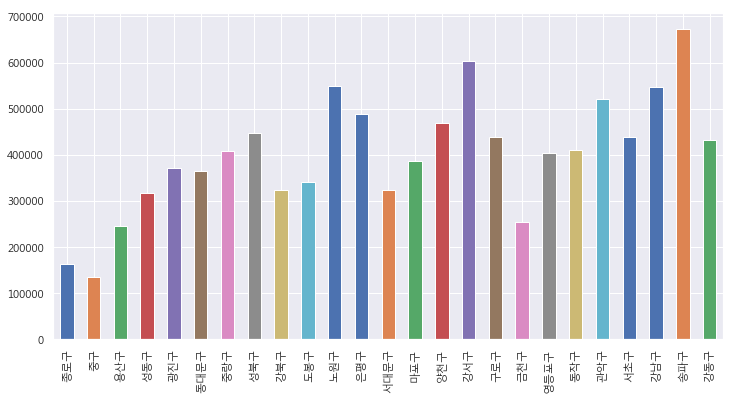

In [33]:
plt.rcParams["figure.figsize"] = [12,6]
df_population = pd.Series(population['인구수'].values, index=population['구'].values)
df_population.plot(kind='bar');

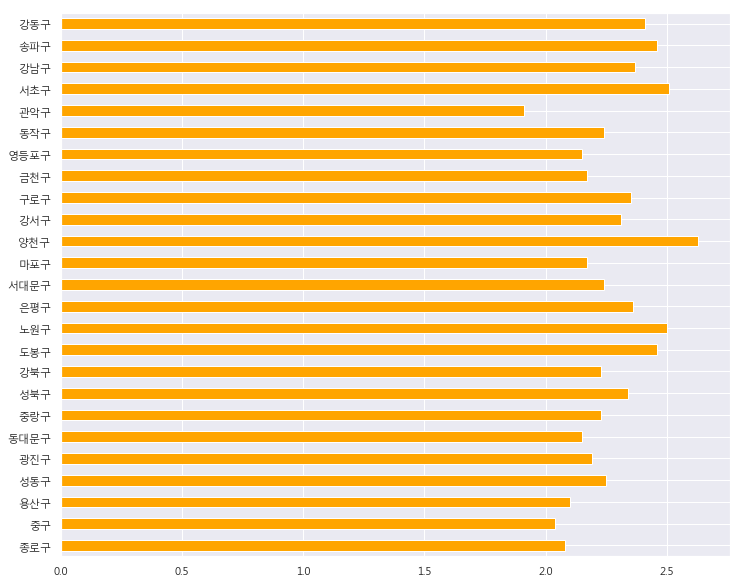

In [34]:
plt.rcParams["figure.figsize"] = [12,10]
df_population = pd.Series(population['세대당인구'].values, index=population['구'].values)
df_population.plot(kind='barh', color='orange');

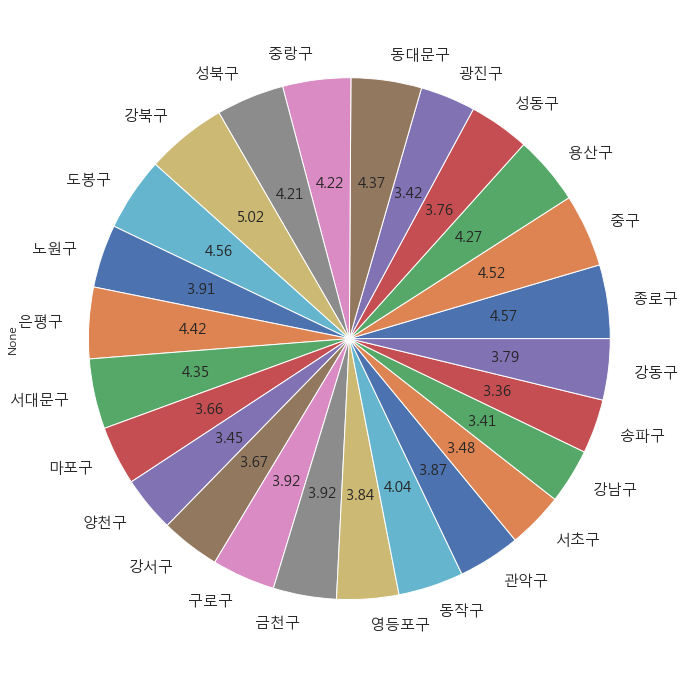

In [35]:
plt.rcParams["figure.figsize"] = [12,12]
df_population = pd.Series(population['고령비율'].values, index=population['구'].values)
df_population.plot(kind='pie', autopct='%.2f', fontsize=15);

In [36]:
population.to_csv('data/seoul_population.csv', sep=',', index=False, encoding='euc-kr')

In [37]:
# % ls data

<hr>
<marquee><font size=3 color='brown'>The BigpyCraft find the information to design valuable society with Technology & Craft.</font></marquee>
<div align='right'><font size=2 color='gray'> &lt; The End &gt; </font></div>